In [2]:
import numpy as np
from MCMC_routines import MC_model,galaxy_template

# Provide your input data:  
   - <b> Sigma_SFR  </b> (M$_{\odot}$/yr/kpc$^2$)
   - <b> Sigma_CII  </b> (L$_{\odot}$/kpc$^2$)
   - <b> Sigma_OIII </b> (L$_{\odot}$/kpc$^2$)
   
stadandard assumed error is 20%

In [5]:
galaxy_example = galaxy_template(
                Sigma_SFR              = 2.0,
                Sigma_CII              = 3.0e+7,
                Sigma_OIII             = 7.0e+7,
                rel_err_Sigma_CII      = 0.2,
                rel_err_Sigma_OIII     = 0.2,
                rel_err_Delta          = 0.2)
galaxy_example.print_info()

Galaxy input data
  Sigma_SFR         =  2.0 Msun/yr/kpc^2
  Sigma_CII         =  30000000.0 Lsun/kpc^2
  Sigma_OIII        =  70000000.0 Lsun/kpc^2
  delta Sigma_SFR   =  20.0 %
  delta Sigma_CIII  =  20.0 %
  delta Sigma_OIII  =  20.0 %


# Set up the MCMC details

There are 3 kind of parameters:

   - priors
   - walker initial position
   - MCMC hyperparameters

these can be set at initialization time of `MC_model` or at a later stage default parameters are adopted if no initialization is provided.

In [6]:
mcr = MC_model()

Set the ranges for the <b> flat priors </b> on log($n$), log($Z$), log($ks$) in the MCMC routines.

The ranges are bound between (`lognMIN, lognMAX`) (`logZMIN, logZMAX`), (`logkMIN, logkMAX`)

with the following defaults:

In [7]:
mcr.set_priors(lognMIN = 0.5, 
               lognMAX= 3.5,
               logZMIN = -1.5, 
               logZMAX= 0, 
               logkMIN = -1, 
               logkMAX= 2.5)

Set the <b> starting point </b>  i.e. the log($n_0$),log($Z_0$),log($k_0$) around which the walkers are initialized

In [8]:
mcr.set_walkers(logn0=2.0,
                logZ0=-0.5,
                logk0 = 0.3)

Set the MCMC <b>hyperparameters</b>. For further details on the meaning of these parameters, 
please have a look at the emcee documentation at https://emcee.readthedocs.io/en/stable/
- <b> n_walkers </b> i.e. the the number of walkers
- <b> steps </b> i.e. the number of steps for each walker
- <b> burn_in </b> i.e. the number of initial steps that one may want to discard (the so-called "burn-in")

***Note that the default number of steps is very low and must be changed (i.e. likely increased) by the user.***

In [9]:
mcr.set_mc_parameters(
        n_walkers = 10,
        steps     = 200,
        burn_in   = 50
        )

Print out your settings

In [10]:
mcr.print_info()

MC parameters
  n_walkers 10
  steps     200
  burn_in   50
Priors
       0.5 < log(n/cm^-3) <        3.5
        -1 < log(k_s)     <        2.5
      -1.5 < log(Z/Z_sun) <          0
walkers starting point
  log n  2.0
  log Z  -0.5
  log k  0.3


Input the galaxy data you have constructed to the MCMC

In [11]:
mcr.set_galaxy_data(galaxy_data = galaxy_example)

# Run the MCMC
Further details on the possibile optimization of the MCMC algorithm and the outputs can be found in the documentation of emcee.

In [12]:
flat_samples = mcr.run_model(verbose=True)

  0%|          | 0/200 [00:00<?, ?it/s]

about to run
MC parameters
  n_walkers 10
  steps     200
  burn_in   50
Priors
       0.5 < log(n/cm^-3) <        3.5
        -1 < log(k_s)     <        2.5
      -1.5 < log(Z/Z_sun) <          0
walkers starting point
  log n  2.0
  log Z  -0.5
  log k  0.3
galaxy data
Galaxy input data
  Sigma_SFR         =  2.0 Msun/yr/kpc^2
  Sigma_CII         =  30000000.0 Lsun/kpc^2
  Sigma_OIII        =  70000000.0 Lsun/kpc^2
  delta Sigma_SFR   =  20.0 %
  delta Sigma_CIII  =  20.0 %
  delta Sigma_OIII  =  20.0 %


100%|██████████| 200/200 [00:05<00:00, 34.59it/s]
N/50 = 4;
tau: [22.32326547 21.09178845 20.95136586]


# Plot the result
For more information and details please refer to: https://corner.readthedocs.io/en/latest/pages/quickstart.html

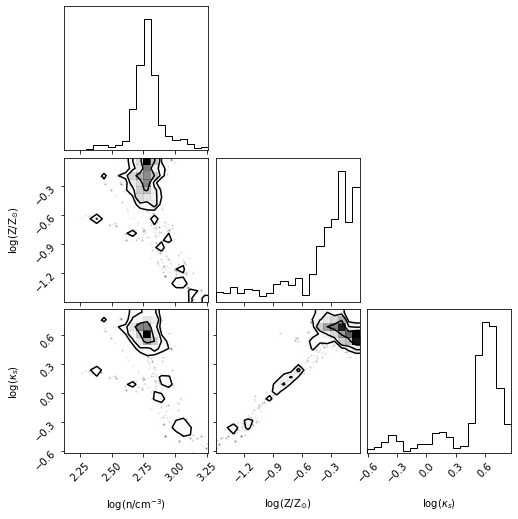

In [13]:
import corner
fig = corner.corner(flat_samples, labels=["log(n/cm$^{-3}$)", "log(Z/Z$_{\odot}$)", "log($\kappa_s$)"])

fig.savefig("test.png")